## The System:

![grafik.png][def]


[def]: .\PTG_System.png

## Preperation
#### Welche Packages brauchen wir NICHT?

In [ ]:
!pip install gurobipy==10.0.0
!pip install pyomo==6.6.2
!pip install numpy==1.24.3
!pip install pandas==1.3.5
#!pip install tsam==2.3.1
!pip install matplotlib
#!pip install july

In [139]:
from gurobipy import *
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tsam.timeseriesaggregation as tsam
#import july
#from july.utils import date_range



## Time Agreegation

load time series data


In [140]:
# Time series data of a whole year with hourly resolution
time_series_data = pd.read_excel(".\Data_Sheet_neu.xlsx")


print(time_series_data)

      Unnamed: 0  s     t  dt  PowerD_demand  HeatD_demand  P_PV_tot  \
0              0  1     1   1          158.4     69.178754   0.00000   
1              1  1     2   1          156.0     56.480866   0.00000   
2              2  1     3   1          156.0     45.267146   0.00000   
3              3  1     4   1          156.6     39.165564   0.00000   
4              4  1     5   1          151.2     40.567279   0.00000   
...          ... ..   ...  ..            ...           ...       ...   
8755        8755  1  8756   1          168.6     15.307163   4.33854   
8756        8756  1  8757   1          174.0     14.920863   0.00000   
8757        8757  1  8758   1          167.4     14.293124   0.00000   
8758        8758  1  8759   1          166.8     23.033177   0.00000   
8759        8759  1  8760   1          160.2     32.497543   0.00000   

      electricity_price  
0             -0.013287  
1             -0.002750  
2             -0.003778  
3             -0.013056  
4    

In [141]:
# Spaltennamen der 2., 3. und 4. Spalte ermitteln
columns_to_drop = time_series_data.columns[[0, 1, 2,3]]

# Neue Variable mit den herausgefilterten Spalten
modified_time_series_data = time_series_data.drop(columns=columns_to_drop)

print(modified_time_series_data)

      PowerD_demand  HeatD_demand  P_PV_tot  electricity_price
0             158.4     69.178754   0.00000          -0.013287
1             156.0     56.480866   0.00000          -0.002750
2             156.0     45.267146   0.00000          -0.003778
3             156.6     39.165564   0.00000          -0.013056
4             151.2     40.567279   0.00000          -0.011539
...             ...           ...       ...                ...
8755          168.6     15.307163   4.33854           0.023130
8756          174.0     14.920863   0.00000           0.020431
8757          167.4     14.293124   0.00000           0.015420
8758          166.8     23.033177   0.00000           0.027447
8759          160.2     32.497543   0.00000           0.006271

[8760 rows x 4 columns]


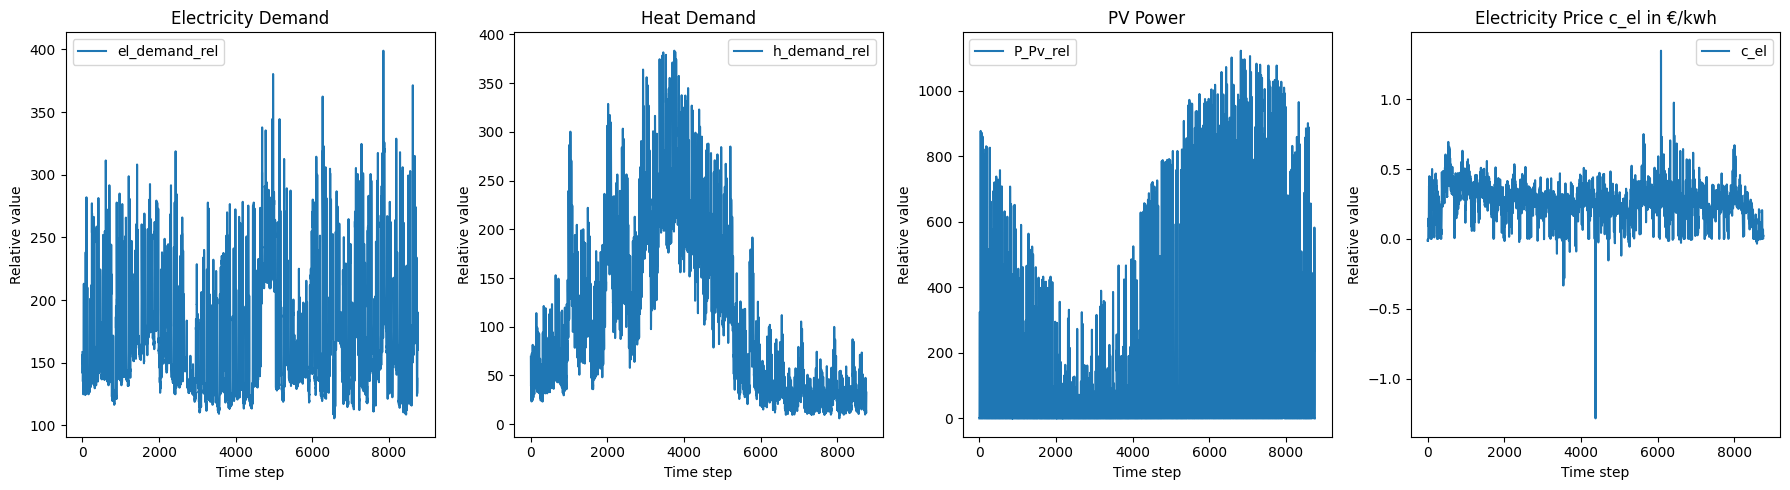

In [142]:
# Erstelle eine Figur mit 3 nebeneinanderliegenden Subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot für den ersten Datensatz
axes[0].plot(modified_time_series_data['PowerD_demand'], label='el_demand_rel')
axes[0].set_xlabel('Time step')
axes[0].set_ylabel('Relative value')
axes[0].legend()
axes[0].set_title('Electricity Demand')

# Plot für den zweiten Datensatz
axes[1].plot(modified_time_series_data['HeatD_demand'], label='h_demand_rel')
axes[1].set_xlabel('Time step')
axes[1].set_ylabel('Relative value')
axes[1].legend()
axes[1].set_title('Heat Demand')

# Plot für den dritten Datensatz
axes[2].plot(modified_time_series_data['P_PV_tot'], label='P_Pv_rel')
axes[2].set_xlabel('Time step')
axes[2].set_ylabel('Relative value')
axes[2].legend()
axes[2].set_title('PV Power')

# Plot für den dritten Datensatz
axes[3].plot(modified_time_series_data['electricity_price'], label='c_el')
axes[3].set_xlabel('Time step')
axes[3].set_ylabel('Relative value')
axes[3].legend()
axes[3].set_title('Electricity Price c_el in €/kwh')

# Layout anpassen
plt.tight_layout()

# Zeige die Plots
plt.show()

Time series aggregation


In [143]:
# aggregate time_series_data with the tsam package
noTypicalPeriods = 4
hoursPerPeriod = 24

aggregation = tsam.TimeSeriesAggregation(
        timeSeries                  = modified_time_series_data,
        noTypicalPeriods            = noTypicalPeriods,
        hoursPerPeriod              = hoursPerPeriod,
        clusterMethod               = 'hierarchical',
        resolution                  = 1
    )
typical_day_time_series_data = aggregation.createTypicalPeriods()

print(typical_day_time_series_data)

            HeatD_demand  P_PV_tot  PowerD_demand  electricity_price
  TimeStep                                                          
0 0           182.102850       0.0     141.020667           0.211352
  1           179.665142       0.0     145.882327           0.209553
  2           172.003772       0.0     143.104235           0.209959
  3           161.556449       0.0     142.409713           0.212087
  4           157.377519       0.0     141.715190           0.232738
...                  ...       ...            ...                ...
3 19          195.106276       0.0     129.213778           0.288634
  20          195.694032       0.0     121.574026           0.263093
  21          227.432872       0.0     124.352118           0.247130
  22          269.163569       0.0     120.184980           0.209781
  23          270.339081       0.0     118.101412           0.222096

[96 rows x 4 columns]


In [144]:
# Assign labels to each original period            #NEW
typical_days_row = aggregation.clusterOrder
print("Cluster Labels:")
print(typical_days_row)
print(len(typical_days_row))

Cluster Labels:
[1 2 2 2 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 0 3 0 0 3 0 0 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 0 0 0 0 3 3 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 2 1 2 2 2 2 2 2 1 1 2 1 1 0 0 1 0 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1
 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 2 1 2 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1]
365


In [145]:
# print the number of days represented by each typical day
for typical_day in np.arange(noTypicalPeriods):
    print(f"Typical day {typical_day} represents {aggregation.clusterPeriodNoOccur[typical_day]} days in the original time series")
    

Typical day 0 represents 92 days in the original time series
Typical day 1 represents 117 days in the original time series
Typical day 2 represents 100 days in the original time series
Typical day 3 represents 56 days in the original time series


Für Seasonal_Storrage Zeitreihen erstellen

In [146]:
days_yeahr=[i for i in range(0, 365)]  #NEW
print(days_yeahr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [147]:
typical_days_dict = dict(zip(days_yeahr, typical_days_row))   #NEW
print(typical_days_dict)

{0: 1, 1: 2, 2: 2, 3: 2, 4: 1, 5: 1, 6: 2, 7: 2, 8: 1, 9: 1, 10: 1, 11: 2, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 0, 42: 0, 43: 0, 44: 0, 45: 1, 46: 1, 47: 1, 48: 0, 49: 0, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 0, 63: 0, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 0, 81: 0, 82: 0, 83: 3, 84: 3, 85: 3, 86: 3, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 1, 108: 1, 109: 1, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 3, 122: 3, 123: 3, 124: 3, 125: 3, 126: 3, 127: 3, 128: 3, 129: 3, 130: 0, 131: 0, 132: 3, 133: 0, 134: 0, 135: 3, 136: 0, 137: 0, 138: 

In [148]:
typical_hours_row =[] #

    
for i in range(0, 365):  #NEW
    #print(i)
    for j in range(24):
        typical_hours_row.append(typical_days_dict[i]*24+j)
        
print(len(typical_hours_row))
print(typical_hours_row)

8760
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 25, 26, 27, 28, 29, 30, 31, 32

In [149]:
# Erstellen der Zahlenreihe von 0 bis 8759
zahlenreihe = list(range(0, 8760))

In [150]:
hours_to_typical_days= dict(zip(zahlenreihe,typical_hours_row))  #NEW
print(hours_to_typical_days)

{0: 24, 1: 25, 2: 26, 3: 27, 4: 28, 5: 29, 6: 30, 7: 31, 8: 32, 9: 33, 10: 34, 11: 35, 12: 36, 13: 37, 14: 38, 15: 39, 16: 40, 17: 41, 18: 42, 19: 43, 20: 44, 21: 45, 22: 46, 23: 47, 24: 48, 25: 49, 26: 50, 27: 51, 28: 52, 29: 53, 30: 54, 31: 55, 32: 56, 33: 57, 34: 58, 35: 59, 36: 60, 37: 61, 38: 62, 39: 63, 40: 64, 41: 65, 42: 66, 43: 67, 44: 68, 45: 69, 46: 70, 47: 71, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 48, 73: 49, 74: 50, 75: 51, 76: 52, 77: 53, 78: 54, 79: 55, 80: 56, 81: 57, 82: 58, 83: 59, 84: 60, 85: 61, 86: 62, 87: 63, 88: 64, 89: 65, 90: 66, 91: 67, 92: 68, 93: 69, 94: 70, 95: 71, 96: 24, 97: 25, 98: 26, 99: 27, 100: 28, 101: 29, 102: 30, 103: 31, 104: 32, 105: 33, 106: 34, 107: 35, 108: 36, 109: 37, 110: 38, 111: 39, 112: 40, 113: 41, 114: 42, 115: 43, 116: 44, 117: 45, 118: 46, 119: 47, 120: 24, 121: 25, 122: 26, 12

In [151]:
# reindex time series to have unique single-dimensional index starting from 0
typical_day_time_series_data = typical_day_time_series_data.reset_index()
typical_day_time_series_data = typical_day_time_series_data.rename(columns={'level_0': 'typical_day'})
typical_day_time_series_data.index = np.arange(0, noTypicalPeriods * hoursPerPeriod)
#TimeStep von 1 bis 95 laufen lassen:
typical_day_time_series_data['TimeStep'] = np.arange(0, noTypicalPeriods * hoursPerPeriod)
print(typical_day_time_series_data)

    typical_day  TimeStep  HeatD_demand  P_PV_tot  PowerD_demand  \
0             0         0    182.102850       0.0     141.020667   
1             0         1    179.665142       0.0     145.882327   
2             0         2    172.003772       0.0     143.104235   
3             0         3    161.556449       0.0     142.409713   
4             0         4    157.377519       0.0     141.715190   
..          ...       ...           ...       ...            ...   
91            3        91    195.106276       0.0     129.213778   
92            3        92    195.694032       0.0     121.574026   
93            3        93    227.432872       0.0     124.352118   
94            3        94    269.163569       0.0     120.184980   
95            3        95    270.339081       0.0     118.101412   

    electricity_price  
0            0.211352  
1            0.209553  
2            0.209959  
3            0.212087  
4            0.232738  
..                ...  
91           0.

In [152]:
#modified_time_series_data.to_excel('modified_time_series_data_new.xlsx', index=False)


## Time series
#### Daten laden

In [153]:
print(modified_time_series_data)

      HeatD_demand  P_PV_tot  PowerD_demand  electricity_price
0        69.178754   0.00000          158.4          -0.013287
1        56.480866   0.00000          156.0          -0.002750
2        45.267146   0.00000          156.0          -0.003778
3        39.165564   0.00000          156.6          -0.013056
4        40.567279   0.00000          151.2          -0.011539
...            ...       ...            ...                ...
8755     15.307163   4.33854          168.6           0.023130
8756     14.920863   0.00000          174.0           0.020431
8757     14.293124   0.00000          167.4           0.015420
8758     23.033177   0.00000          166.8           0.027447
8759     32.497543   0.00000          160.2           0.006271

[8760 rows x 4 columns]


In [154]:
print(typical_day_time_series_data)

    typical_day  TimeStep  HeatD_demand  P_PV_tot  PowerD_demand  \
0             0         0    182.102850       0.0     141.020667   
1             0         1    179.665142       0.0     145.882327   
2             0         2    172.003772       0.0     143.104235   
3             0         3    161.556449       0.0     142.409713   
4             0         4    157.377519       0.0     141.715190   
..          ...       ...           ...       ...            ...   
91            3        91    195.106276       0.0     129.213778   
92            3        92    195.694032       0.0     121.574026   
93            3        93    227.432872       0.0     124.352118   
94            3        94    269.163569       0.0     120.184980   
95            3        95    270.339081       0.0     118.101412   

    electricity_price  
0            0.211352  
1            0.209553  
2            0.209959  
3            0.212087  
4            0.232738  
..                ...  
91           0.

In [155]:
time_slices = np.array(typical_day_time_series_data.index)

shifted_time_slices = [] # time slice number shifted by 1 to create the storage level constraint
time_slice_weight = []

for typical_period in np.arange(noTypicalPeriods):
    time_slices_within_typical_period = typical_day_time_series_data[typical_day_time_series_data.typical_day == typical_period].index
    shifted_time_slices_within_period = np.roll(time_slices_within_typical_period,-1)
    shifted_time_slices.extend(shifted_time_slices_within_period) 
    time_slice_weight.extend(aggregation.clusterPeriodNoOccur[typical_period]*np.ones(len(time_slices_within_typical_period)))
    
print(shifted_time_slices)
print(time_slice_weight)

# weight of each time slice [h]
time_slice_weight = dict(zip(time_slices, time_slice_weight))

# consecutive time slice of each time slice
next_time_slice = dict(zip(time_slices, shifted_time_slices))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 48, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 72]
[92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0]


In [156]:
# Erstellen des Dictionaries
storage_next_time_slices = {zahlenreihe[i]: zahlenreihe[(i + 1) % len(zahlenreihe)] for i in range(len(zahlenreihe))}

# Ausgabe des Ergebnisses
print(storage_next_time_slices)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121, 121: 12

In [157]:
print(time_slices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


In [158]:
 # gas price of each time slice
power_demand_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['PowerD_demand'])))

# # heat demand of each time slice
heat_demand_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['HeatD_demand'])))

# # electricity_price of each time slice
electricity_price_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['electricity_price'])))

# # PV_Power of eacj time slice
power_PV_time_series = dict(zip(time_slices, np.array(typical_day_time_series_data['P_PV_tot'])))



## Setting up the model:

In [159]:
model = ConcreteModel()


# declare sets
model.time_slices = set(time_slices)
model.time_slices_through_whole_yeahr = set(zahlenreihe)

In [160]:
print(model.time_slices)
print(model.time_slices_through_whole_yeahr)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,

In [161]:
# declare decision variables
model.OPEX = Var(domain=NonNegativeReals) # [€]

# declare time dependent decision variables
model.P_e_buy = Var(model.time_slices, domain=NonNegativeReals) # Power, that needs to get bought from the grid [kW_e]
model.P_CH4_sell = Var(model.time_slices, domain=NonNegativeReals) # CH4, that gets to sell to the grid [kW_CH4]
#model.mdot_CO2_atm = Var(model.time_slices, domain=NonNegativeReals) # CH4, that gets to sell to the grid [kW_CH4]

# Component_Inputs
model.P_e_PEM = Var(model.time_slices, domain=NonNegativeReals) # Electrolysis [kW_e]
model.P_e_DAC = Var(model.time_slices, domain=NonNegativeReals) # DirectAirCapture [kW_e]
model.P_H2_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_H2]
model.mdot_CO2_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_CO2] STIMMT EINHEIT???
model.P_CH4_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_CH4]
model.P_CH4_BO = Var(model.time_slices, domain=NonNegativeReals) # Boiler [kW_CH4]

model.y_PEM = Var(model.time_slices, domain=Binary) # Electrolysis, on/off
#model.y_CHP = Var(model.time_slices, domain=Binary) # CombinedHeatPower, on/off
model.y_BO = Var(model.time_slices, domain=Binary) # Boiler, on/off

# Component_Outputs
model.P_e_PV = Var(model.time_slices, domain=NonNegativeReals) # PV [kW_e]
model.P_H2_PEM = Var(model.time_slices, domain=NonNegativeReals) # Electrolysis [kW_H2]
model.mdot_CO2_DAC = Var(model.time_slices, domain=NonNegativeReals) # DirectAirCapture [kg_CO2/hr]
model.P_CH4_MR = Var(model.time_slices, domain=NonNegativeReals) # MethaneReformation [kW_CH4]
model.P_e_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_e]
model.P_h_CHP = Var(model.time_slices, domain=NonNegativeReals) # CombinedHeatPower [kW_h]
model.P_h_BO = Var(model.time_slices, domain=NonNegativeReals) # Boiler [kW_h]                      

# Storages
model.P_e_battery = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_e]  #hier ist die Frage_model.time_slices oder model.time_slices_through_whole_yeahr
model.P_e_battery_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_e] 
model.P_e_battery_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) #  [kW_e]
model.storage_level_battery = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh]
model.in_battery =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_battery = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_e_battery_yearly = Var(model.time_slices_through_whole_yeahr, domain=Reals) # [kW_e]

model.P_h_thermalStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_h]
model.P_h_thermalStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_h]
model.P_h_thermalStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_h]
model.storage_level_thermalStorage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh]
model.in_thermalStorage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_thermalStorage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_h_thermalStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_h]

model.P_H2_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_H2]
model.P_H2_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_H2]
model.P_H2_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_H2]
model.storage_level_H2Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh_H2]
model.in_H2Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_H2Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_H2_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_H2]

model.mdot_CO2_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kg_CO2/hr]
model.mdot_CO2_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2/hr]
model.mdot_CO2_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2/hr]
model.storage_level_CO2Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kg_CO2]
model.in_CO2Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_CO2Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.mdot_CO2_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kg_CO2/hr]

model.P_CH4_gasStorage = Var(model.time_slices, domain=Reals) # [negative: storage charge, positive: storage discharge] [kW_CH4]
model.P_CH4_gasStorage_in = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_CH4]
model.P_CH4_gasStorage_out = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kW_CH4]
model.storage_level_CH4Storage = Var(model.time_slices_through_whole_yeahr, domain=NonNegativeReals) # [kWh_CH4]
model.in_CH4Storage =  Var(model.time_slices_through_whole_yeahr, domain=Binary) #einspeichern
model.out_CH4Storage = Var(model.time_slices_through_whole_yeahr, domain=Binary) #ausspeichern
model.P_CH4_gasStorage_yearly = Var(model.time_slices_through_whole_yeahr,domain=Reals) # [kW_CH4]

In [162]:
# declare parameters

model.price_co2 = 84.4 # [€/ton]
model.price_gas = 0.0775 # [€/kWh]


#model.P_e_N_PV = 900 #[kW_e]
#!!! Muss noch geklärt werden!!

#model.P_e_N_PEM = 900 #[kW_e]
#model.eta_N_PEM = 0.63 #eta muss noch linerarisiert werden!!
#!!model.P_H2_min_PEM = 146.75 #[kW_H2]
#!!model.P_H2_max_PEM = 641.13 #[kW_H2]f
model.P_e_min_PEM = 180 #[kW_e]
model.P_e_max_PEM = 1080 #[kW_e]
#model.p_min_PEM = 0.2
#model.p_max_PEM = 1.2

model.mdot_CO2_N_DAC = 250 #[kg_CO2/hr]
model.eta_DAC = 0.5 #[kg_CO2/kWh_e]

model.P_CH4_N_MR = 1500 #[kW_CH4]
model.eta_MR = 0.78
model.co2need_MR = 0.178 #E_in_CO2/E_out_CH4 [kg_CO2/kWh_CH4]


#model.P_h_N_CHP = 800 #[kW_h]
#model.eta__N_CHP_Q = 0.47 #eta muss noch linerarisiert werden!!
#model.P_h_min_CHP = 56.525 #[kW_h]
#model.P_h_max_CHP = 176.71 #[kW_h]
#model.P_e_min_CHP = 36.8 #[kW_e]
#model.P_e_max_CHP = 128 #[kW_e]
#model.P_CH4_min_CHP = 400 #[kW_CH4]
#model.P_CH4_max_CHP = 800 #[kW_CH4]
#model.eta_N_CHP_P = 0.4 #eta muss noch linerarisiert werden!!
#model.p_min_CHP = 0.5
#model.p_max_CHP = 1

#model.P_h_N_BO = 500 #[kW_h]
#model.eta_N_BO = 0.9 #eta muss noch linerarisiert werden!
model.P_CH4_min_BO = 0.5 #[kW_CH4]
model.P_CH4_max_BO = 500 #[kW_cH4]
#!!model.P_h_min_BO = 0.00164#[kW_h]
#!!model.P_h_max_BO = 450 #[kW_h]
#model.p_min_BO = 0.001
#model.p_max_BO = 1

model.E_N_battery = 5000 #[kWh_e]
model.eta_battery = 0.92 
model.loss_battery = 0.000042 #[1/hr]
model.c_battery = 0.36 #[1/hr]

model.Q_N_thermalStorage = 5000 #[kWh_Q]
model.eta_thermalStorage = 0.95 
model.loss_thermalStorage = 0.005 #[1/hr]
model.c_thermalStorage = 1 #[1/hr]

model.E_N_H2Storage = 5000 #[kWh_H2]
model.m_N_CO2Storage = 5000 #[kg_CO2]
model.E_N_CH4Storage = 5000 #[kWh_CH4]
model.loss_gasTanks = 0 #[1/hr]
model.eta_gasTanks = 1 
model.c_gasTanks = 0.25 #[1/hr]


In [163]:
#declare time dependent parameters
model.P_e_demand = Param(model.time_slices, initialize = power_demand_time_series)
model.Q_demand = Param(model.time_slices, initialize = heat_demand_time_series)

model.electricity_price = Param(model.time_slices, initialize = electricity_price_time_series)

model.P_PV = Param(model.time_slices, initialize = power_PV_time_series)


In [164]:
# declare unindexed constraints
model.OPEX_constraint = Constraint(expr =  model.OPEX == sum(model.electricity_price[time_slice]*model.P_e_buy[time_slice] for time_slice in model.time_slices) 
                                     -  sum(model.price_gas * model.P_CH4_sell[time_slice] for time_slice in model.time_slices))

#+  sum(model.price_co2 * model.mdot_CO2_atm[time_slice] for time_slice in model.time_slices)

# declare rules to setup indexed constraints
def electricty_balance_constraint_rule(model, time_slice):
    return (model.P_e_PV[time_slice] + model.P_e_CHP[time_slice] + model.P_e_battery[time_slice] + model.P_e_buy[time_slice] == model.P_e_demand[time_slice] + model.P_e_PEM[time_slice] + model.P_e_DAC[time_slice])

def heat_balance_constraint_rule(model, time_slice):
    return (model.P_h_CHP[time_slice] + model.P_h_BO[time_slice] + model.P_h_thermalStorage[time_slice] == model.Q_demand[time_slice])

def h2_balance_constraint_rule(model, time_slice):
    return (model.P_H2_PEM[time_slice] + model.P_H2_gasStorage[time_slice] == model.P_H2_MR[time_slice])

def co2_balance_contraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] + model.mdot_CO2_gasStorage[time_slice] == model.mdot_CO2_MR[time_slice])

def ch4_balance_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] + model.P_CH4_gasStorage[time_slice] == model.P_CH4_CHP[time_slice] + model.P_CH4_BO[time_slice] + model.P_CH4_sell[time_slice])

##Components, Input->Output, Nenngröße, 
#def PV_constraint_rule(model, time_slice):
#    return model.P_e_PV[time_slice] <= model.P_e_N_PV * model.P_PV[time_slice]
#!!!! passt die Gleichung zu den Inputs? CHecken!!

def PV_constraint_rule(model, time_slice):
    return (model.P_e_PV[time_slice] == model.P_PV[time_slice])

def PEM_constraint_rule(model, time_slice):
    return (model.P_H2_PEM[time_slice] == 47.877 * model.y_PEM[time_slice] + 0.549 * model.P_e_PEM[time_slice])
def PEM_minInput_constraint_rule(model, time_slice):
    return (model.P_e_PEM[time_slice] >= model.P_e_min_PEM * model.y_PEM[time_slice])
def PEM_maxInput_constraint_rule(model, time_slice):
    return (model.P_e_PEM[time_slice] <= model.P_e_max_PEM* model.y_PEM[time_slice])
#def PEM_minOuput_constraint_rule(model, time_slice):
#    return (model.P_H2_PEM[time_slice] >= model.P_H2_min_PEM* model.y_PEM[time_slice]) #ein/aus Variabel hier notwendig?
#def PEM_maxOuput_constraint_rule(model, time_slice):
#    return (model.P_H2_PEM[time_slice] <= model.P_H2_max_PEM* model.y_PEM[time_slice]) #ein/aus Variabel hier notwendig?

def DAC_constraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] == model.eta_DAC * model.P_e_DAC[time_slice])
def DAC_maxOuput_constraint_rule(model, time_slice):
    return (model.mdot_CO2_DAC[time_slice] <= model.mdot_CO2_N_DAC)


def MR_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] == model.eta_MR * model.P_H2_MR[time_slice])
def MR_CO2_constraint_rule(model, time_slice):
    return (model.mdot_CO2_MR[time_slice] == model.co2need_MR * model.P_CH4_MR[time_slice])
def MR_maxOuput_constraint_rule(model, time_slice):
    return (model.P_CH4_MR[time_slice] <= model.P_CH4_N_MR)

#hier

#def CHP_heat_constraint_rule(model, time_slice):
#    return model.P_h_CHP[time_slice] == -80.948 * model.y_CHP[time_slice] + 0.317 * model.P_CH4_CHP[time_slice]

def CHP_heat_constraint_rule(model, time_slice):
    return (model.P_h_CHP[time_slice] == 0.47 * model.P_CH4_CHP[time_slice])

#def CHP_heat_minOuput_constraint_rule(model, time_slice):
#    return model.P_h_CHP[time_slice] >= model.P_h_min_CHP * model.y_CHP[time_slice] #ein/aus Variabel hier notwendig?
#def CHP_heat_maxOuput_constraint_rule(model, time_slice):
#    return model.P_h_CHP[time_slice] <= model.P_h_max_CHP * model.y_CHP[time_slice] #ein/aus Variabel hier notwendig?
#def CHP_electricity_constraint_rule(model, time_slice):
#    return model.P_e_CHP[time_slice] == -58.168 * model.y_CHP[time_slice]+ 0.229 * model.P_CH4_CHP[time_slice]
def CHP_electricity_constraint_rule(model, time_slice):
    return (model.P_e_CHP[time_slice] == 0.4 * model.P_CH4_CHP[time_slice])
#def CHP_electricity_minOuput_constraint_rule(model, time_slice):
 #   return model.P_e_CHP[time_slice] >= model.P_e_min_CHP * model.y_CHP[time_slice] #ein/aus Variabel hier notwendig?
#def CHP_electricity_maxOuput_constraint_rule(model, time_slice):
  #  return model.P_e_CHP[time_slice] <= model.P_e_max_CHP * model.y_CHP[time_slice] #ein/aus Variabel hier notwendig?
#def CHP_minInput_constraint_rule(model, time_slice):
   # return model.P_CH4_CHP[time_slice] >= model.P_CH4_min_CHP * model.y_CHP[time_slice]
#def CHP_maxInput_constraint_rule(model, time_slice):
    #return model.P_CH4_CHP[time_slice] <= model.P_CH4_max_CHP * model.y_CHP[time_slice]
def CHP_maxInput_constraint_rule(model, time_slice):
    return (model.P_CH4_CHP[time_slice] <= 1702.12766)
    
    
    
    
def BO_constraint_rule(model, time_slice):
    return (model.P_h_BO[time_slice]  == -26.704 * model.y_BO[time_slice] + 0.955 * model.P_CH4_BO[time_slice])
def BO_minInput_constraint_rule(model, time_slice):
    return (model.P_CH4_BO[time_slice] >= model.P_CH4_min_BO * model.y_BO[time_slice])
def BO_maxInput_constraint_rule(model, time_slice):
    return (model.P_CH4_BO[time_slice] <= model.P_CH4_max_BO * model.y_BO[time_slice])
#def BO_minOuput_constraint_rule(model, time_slice):
 #   return (model.P_h_BO[time_slice] >= model.P_h_min_BO * model.y_BO[time_slice]) #ein/aus Variabel hier notwendig?
#def BO_maxOuput_constraint_rule(model, time_slice):
 #   return (model.P_h_BO[time_slice] <= model.P_h_max_BO * model.y_BO[time_slice]) #ein/aus Variabel hier notwendig?



##Storages, storage_level, storage_maximum

#Battery
def battery_level_constraint_rule(model, time_slice_through_whole_yeahr):
    return (model.storage_level_battery[storage_next_time_slices[time_slice_through_whole_yeahr]] == 
        model.storage_level_battery[time_slice_through_whole_yeahr] * (1-model.loss_battery)
        + (model.P_e_battery_in[time_slice_through_whole_yeahr]*model.eta_battery - model.P_e_battery_out[time_slice_through_whole_yeahr]/model.eta_battery))
    
def battery_Energy_balance_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_yearly[time_slice_through_whole_yeahr] == -model.P_e_battery_in[time_slice_through_whole_yeahr] + model.P_e_battery_out[time_slice_through_whole_yeahr])
    
def battery_level_max_in_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_in[time_slice_through_whole_yeahr] <= model.in_battery[time_slice_through_whole_yeahr]*model.c_battery*model.E_N_battery)
    
def battery_level_max_out_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.P_e_battery_out[time_slice_through_whole_yeahr] <= model.out_battery[time_slice_through_whole_yeahr]*model.c_battery*model.E_N_battery)

def battery_in_or_out_or_off_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.in_battery[time_slice_through_whole_yeahr] + model.out_battery[time_slice_through_whole_yeahr] <= 1)

def connect_battery_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.P_e_battery_yearly[time_slices_though_whole_year] == model.P_e_battery[hours_to_typical_days[time_slices_though_whole_year]]



#thermalStorage
def thermalStorage_level_constraint_rule(model, time_slice_through_whole_yeahr):
    return  (model.storage_level_thermalStorage[storage_next_time_slices[time_slice_through_whole_yeahr]] == (
        model.storage_level_thermalStorage[time_slice_through_whole_yeahr] * (1-model.loss_thermalStorage)
        + (model.P_h_thermalStorage_in[time_slice_through_whole_yeahr]*model.eta_thermalStorage - model.P_h_thermalStorage_out[time_slice_through_whole_yeahr]/model.eta_thermalStorage)))

def thermalStorage_Energy_balance_constraint_rule(model, time_slices_through_whole_yeahr):  
    return  (model.P_h_thermalStorage_yearly[time_slices_through_whole_yeahr] == - model.P_h_thermalStorage_in[time_slices_through_whole_yeahr] + model.P_h_thermalStorage_out[time_slices_through_whole_yeahr])  

def thermalStorage_level_max_in_constraint_rule(model, time_slices_through_whole_yeahr):        
    return  (model.P_h_thermalStorage_in[time_slices_through_whole_yeahr] <= model.in_thermalStorage[time_slices_through_whole_yeahr]*model.c_thermalStorage*model.Q_N_thermalStorage)

def thermalStorage_level_max_out_constraint_rule(model, time_slices_through_whole_yeahr):    
    return  (model.P_h_thermalStorage_out[time_slices_through_whole_yeahr] <= model.out_thermalStorage[time_slices_through_whole_yeahr]*model.c_thermalStorage*model.Q_N_thermalStorage)

def thermalStorage_in_or_out_or_off_constraint_rule(model, time_slices_through_whole_yeahr):    
    return  (model.in_thermalStorage[time_slices_through_whole_yeahr] + model.out_thermalStorage[time_slices_through_whole_yeahr] <= 1)

def connect_thermalStorage_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.P_h_thermalStorage_yearly[time_slices_though_whole_year] == model.P_h_thermalStorage[hours_to_typical_days[time_slices_though_whole_year]]


#H2Storage
def H2Storage_level_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.storage_level_H2Storage[storage_next_time_slices[time_slices_through_whole_yeahr]] == (
        model.storage_level_H2Storage[time_slices_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.P_H2_gasStorage_in[time_slices_through_whole_yeahr]*model.eta_gasTanks - model.P_H2_gasStorage_out[time_slices_through_whole_yeahr]/model.eta_gasTanks)))   
    
def H2Storage_Energy_balance_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_H2_gasStorage_yearly[time_slices_through_whole_yeahr] == -model.P_H2_gasStorage_in[time_slices_through_whole_yeahr] + model.P_H2_gasStorage_out[time_slices_through_whole_yeahr]) 

def H2Storage_level_max_in_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_H2_gasStorage_in[time_slices_through_whole_yeahr] <= model.in_H2Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.E_N_H2Storage)

def H2Storage_level_max_out_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_H2_gasStorage_out[time_slices_through_whole_yeahr] <= model.out_H2Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.E_N_H2Storage)

def H2Storage_in_or_out_or_off_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.in_H2Storage[time_slices_through_whole_yeahr] + model.out_H2Storage[time_slices_through_whole_yeahr] <= 1)

def connect_H2Storage_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.P_H2_gasStorage_yearly[time_slices_though_whole_year] == model.P_H2_gasStorage[hours_to_typical_days[time_slices_though_whole_year]]


#CO2Storage
def CO2Storage_level_constraint_rule(model, time_slices_through_whole_yeahr):    
    return  (model.storage_level_CO2Storage[storage_next_time_slices[time_slices_through_whole_yeahr]] == (
        model.storage_level_CO2Storage[time_slices_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.mdot_CO2_gasStorage_in[time_slices_through_whole_yeahr]*model.eta_gasTanks - model.mdot_CO2_gasStorage_out[time_slices_through_whole_yeahr]/model.eta_gasTanks)))   
    
def CO2Storage_Energy_balance_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_yearly[time_slices_through_whole_yeahr] == -model.mdot_CO2_gasStorage_in[time_slices_through_whole_yeahr] + model.mdot_CO2_gasStorage_out[time_slices_through_whole_yeahr])  

def CO2Storage_level_max_in_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_in[time_slices_through_whole_yeahr] <= model.in_CO2Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.m_N_CO2Storage)

def CO2Storage_level_max_out_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.mdot_CO2_gasStorage_out[time_slices_through_whole_yeahr] <= model.out_CO2Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.m_N_CO2Storage)

def CO2Storage_in_or_out_or_off_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.in_CO2Storage[time_slices_through_whole_yeahr] + model.out_CO2Storage[time_slices_through_whole_yeahr] <= 1)

def connect_CO2Storage_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.mdot_CO2_gasStorage_yearly[time_slices_though_whole_year] == model.mdot_CO2_gasStorage[hours_to_typical_days[time_slices_though_whole_year]]


#CH4Storage	
def CH4Storage_level_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.storage_level_CH4Storage[storage_next_time_slices[time_slices_through_whole_yeahr]] == (
        model.storage_level_CH4Storage[time_slices_through_whole_yeahr] * (1-model.loss_gasTanks)
        + (model.P_CH4_gasStorage_in[time_slices_through_whole_yeahr]*model.eta_gasTanks - model.P_CH4_gasStorage_out[time_slices_through_whole_yeahr]/model.eta_gasTanks)))

def CH4Storage_Energy_balance_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_yearly[time_slices_through_whole_yeahr] == -model.P_CH4_gasStorage_in[time_slices_through_whole_yeahr] + model.P_CH4_gasStorage_out[time_slices_through_whole_yeahr])

def CH4Storage_level_max_in_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_in[time_slices_through_whole_yeahr] <= model.in_CH4Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.E_N_CH4Storage)

def CH4Storage_level_max_out_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.P_CH4_gasStorage_out[time_slices_through_whole_yeahr] <= model.out_CH4Storage[time_slices_through_whole_yeahr]*model.c_gasTanks*model.E_N_CH4Storage)

def CH4Storage_in_or_out_or_off_constraint_rule(model, time_slices_through_whole_yeahr):
    return  (model.in_CH4Storage[time_slices_through_whole_yeahr] + model.out_CH4Storage[time_slices_through_whole_yeahr] <= 1)

def connect_CH4Storage_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.P_CH4_gasStorage_yearly[time_slices_though_whole_year] == model.P_CH4_gasStorage[hours_to_typical_days[time_slices_though_whole_year]]


# declare indexed constraints



model.CH4Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_constraint_rule)
model.CH4Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_Energy_balance_constraint_rule)
model.CH4Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_max_in_constraint_rule)
model.CH4Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_level_max_out_constraint_rule)
model.CH4Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CH4Storage_in_or_out_or_off_constraint_rule)
model.connect_CH4Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_CH4Storage_time_slices_rule)

model.Co2Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_constraint_rule)
model.Co2Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_Energy_balance_constraint_rule)
model.Co2Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_max_out_constraint_rule)
model.Co2Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_level_max_in_constraint_rule)
model.Co2Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=CO2Storage_in_or_out_or_off_constraint_rule)
model.connect_CO2Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_CO2Storage_time_slices_rule)

model.H2Storage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_constraint_rule)
model.H2Storage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_Energy_balance_constraint_rule)
model.H2Storage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_max_out_constraint_rule)
model.H2Storage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_level_max_in_constraint_rule)
model.H2Storage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=H2Storage_in_or_out_or_off_constraint_rule)
model.commect_H2Storage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_H2Storage_time_slices_rule)

model.thermalStorage_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_constraint_rule)
model.thermalStorage_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_Energy_balance_constraint_rule)
model.thermalStorage_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_max_out_constraint_rule)
model.thermalStorage_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_level_max_in_constraint_rule)
model.thermalStorage_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=thermalStorage_in_or_out_or_off_constraint_rule)
model.connect_thermalStorage_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_thermalStorage_time_slices_rule)

model.battery_level_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_constraint_rule)
model.battery_Energy_balance_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_Energy_balance_constraint_rule)
model.battery_level_max_out_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_max_out_constraint_rule)
model.battery_level_max_in_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_level_max_in_constraint_rule)
model.battery_in_or_out_or_off_constraint = Constraint(model.time_slices_through_whole_yeahr, rule=battery_in_or_out_or_off_constraint_rule)
model.connect_battery_time_slices = Constraint(model.time_slices_through_whole_yeahr, rule=connect_battery_time_slices_rule)



model.electricty_balance_constraint = Constraint(model.time_slices, rule=electricty_balance_constraint_rule)
model.heat_balance_constraint = Constraint(model.time_slices, rule=heat_balance_constraint_rule)
model.h2_balance_constraint = Constraint(model.time_slices, rule=h2_balance_constraint_rule)
model.co2_balance_contraint = Constraint(model.time_slices, rule=co2_balance_contraint_rule)
model.ch4_balance_constraint = Constraint(model.time_slices, rule=ch4_balance_constraint_rule)


model.PV_constraint = Constraint(model.time_slices, rule=PV_constraint_rule)
model.PEM_constraint = Constraint(model.time_slices, rule=PEM_constraint_rule)
model.PEM_minInput_constraint = Constraint(model.time_slices, rule=PEM_minInput_constraint_rule)
model.PEM_maxInput_constraint = Constraint(model.time_slices, rule=PEM_maxInput_constraint_rule)
#model.PEM_minOuput_constraint = Constraint(model.time_slices, rule=PEM_minOuput_constraint_rule)
#model.PEM_maxOuput_constraint = Constraint(model.time_slices, rule=PEM_maxOuput_constraint_rule)
model.DAC_constraint = Constraint(model.time_slices, rule=DAC_constraint_rule)
model.DAC_maxOuput_constraint = Constraint(model.time_slices, rule=DAC_maxOuput_constraint_rule)
model.MR_constraint = Constraint(model.time_slices, rule=MR_constraint_rule)
model.MR_CO2_constraint = Constraint(model.time_slices, rule=MR_CO2_constraint_rule)
model.MR_maxOuput_constraint = Constraint(model.time_slices, rule=MR_maxOuput_constraint_rule)
model.CHP_heat_constraint = Constraint(model.time_slices, rule=CHP_heat_constraint_rule)
#model.CHP_heat_minOuput_constraint = Constraint(model.time_slices, rule=CHP_heat_minOuput_constraint_rule)
#model.CHP_heat_maxOuput_constraint = Constraint(model.time_slices, rule=CHP_heat_maxOuput_constraint_rule)
model.CHP_electricity_constraint = Constraint(model.time_slices, rule=CHP_electricity_constraint_rule)
#model.CHP_electricity_minOuput_constraint = Constraint(model.time_slices, rule=CHP_electricity_minOuput_constraint_rule)
#model.CHP_electricity_maxOuput_constraint = Constraint(model.time_slices, rule=CHP_electricity_maxOuput_constraint_rule)
#model.CHP_minInput_constraint = Constraint(model.time_slices, rule=CHP_minInput_constraint_rule)
model.CHP_maxInput_constraint = Constraint(model.time_slices, rule=CHP_maxInput_constraint_rule)
model.BO_constraint = Constraint(model.time_slices, rule=BO_constraint_rule)
model.BO_minInput_constraint = Constraint(model.time_slices, rule=BO_minInput_constraint_rule)
model.BO_maxInput_constraint = Constraint(model.time_slices, rule=BO_maxInput_constraint_rule)
#model.BO_minOuput_constraint = Constraint(model.time_slices, rule=BO_minOuput_constraint_rule)
#model.BO_maxOuput_constraint = Constraint(model.time_slices, rule=BO_maxOuput_constraint_rule)


## Solving the problem

In [165]:
# declare objective
model.total_costs = Objective(expr = model.OPEX,
    sense = minimize)

In [166]:
# Solver
solver = SolverFactory('gurobi')
#solver.options['TimeLimit'] = 3600  # Zeitlimit in Sekunden (hier 1 Stunde)
#solver.options['MIPGap'] = 0.01  # Maximale Abweichung von der optimalen Lösung in Prozent
solver.options['NodeLimit'] = 4000  # Maximale Anzahl an Knoten im Baum, die der Solver durchlaufen soll
#solver.options['IterationLimit'] = 1000  # Maximale Anzahl an Iterationen
solver.options['MIPGap'] = 0.02  # Beispiel für einen sehr kleinen MIPGap
solver.options['Heuristics'] = 0.8  # Aktiviere Heuristiken zu 80%
solver.options['Cuts'] = 1  # Aktiviere aggressive Schnitte

# Modell lösen
results = solver.solve(model, tee=True)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-15
Read LP format model from file C:\Users\eva-m\AppData\Local\Temp\tmpiw8gxrdi.pyomo.lp
Reading time = 0.64 seconds
x1: 264721 rows, 264913 columns, 661801 nonzeros
Set parameter NodeLimit to value 4000
Set parameter MIPGap to value 0.02
Set parameter Heuristics to value 0.8
Set parameter Cuts to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 264721 rows, 264913 columns and 661801 nonzeros
Model fingerprint: 0x97f9e4b2
Variable types: 177121 continuous, 87792 integer (87792 binary)
Coefficient statistics:
  Matrix range     [8e-02, 5e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+03]
Presolve removed 88752 rows and 8836

In [167]:
print(f"OPEX = {model.OPEX.value} €")

OPEX = 3323.0386081303245 €


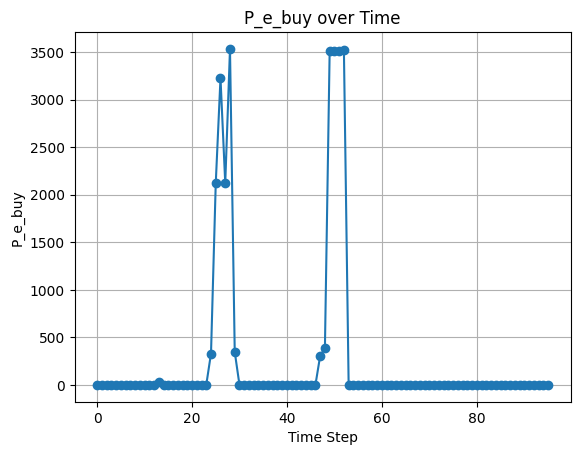

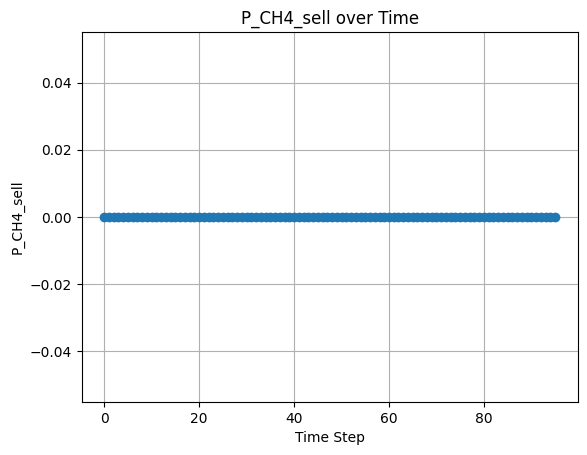

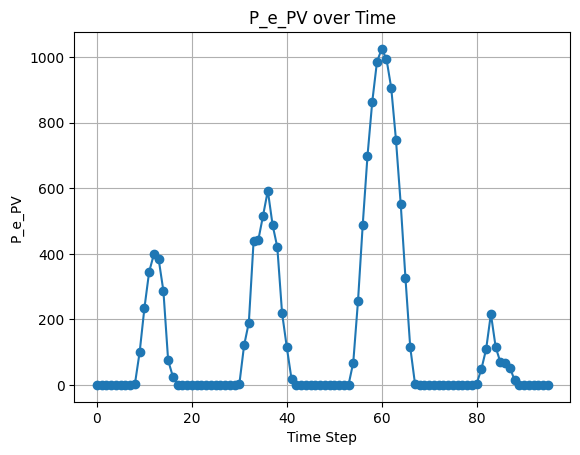

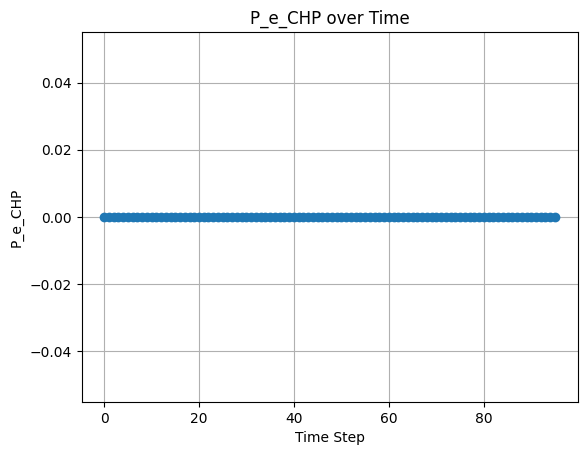

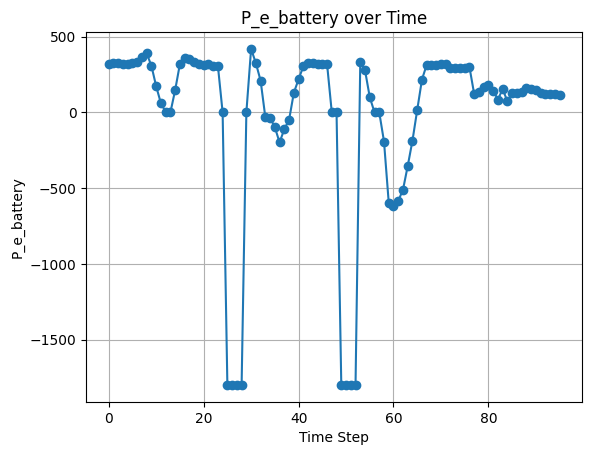

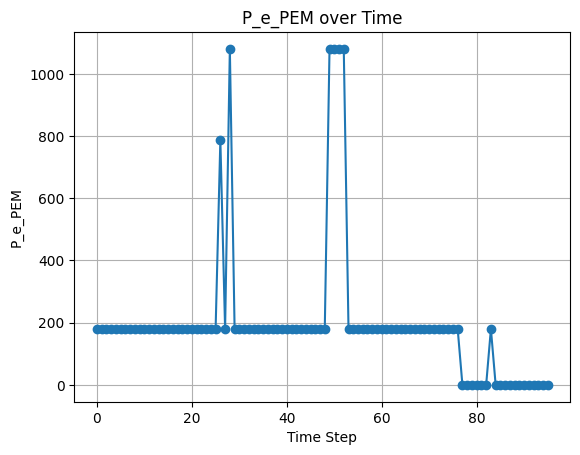

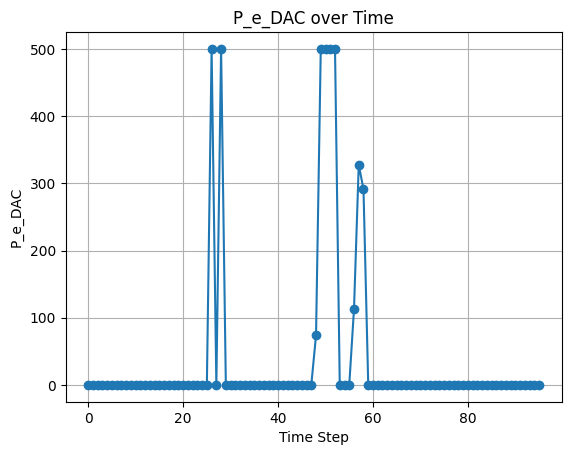

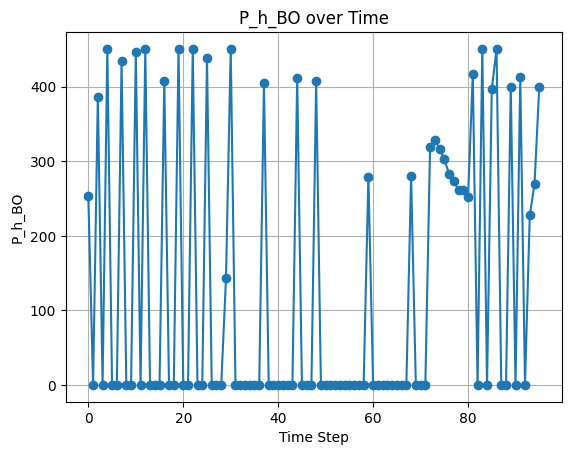

In [170]:
import matplotlib.pyplot as plt

# Liste der Variablennamen, die geplottet werden sollen
variables_to_plot = ['P_e_buy', 'P_CH4_sell', 'P_e_PV', 'P_e_CHP', 'P_e_battery', 'P_e_PEM', 'P_e_DAC', 'P_h_BO']

# Plotten der Variablen
for var_name in variables_to_plot:
    var_object = getattr(model, var_name)
    time_steps = sorted(var_object.index_set())
    values = [var_object[t].value for t in time_steps]
    
    plt.figure()
    plt.plot(time_steps, values, marker='o')
    plt.xlabel('Time Step')
    plt.ylabel(var_name)
    plt.title(f'{var_name} over Time')
    plt.grid(True)
    plt.show()

